In [1]:
import pandas as pd
import numpy as np
import geopandas
import seaborn as sns
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geographiclib.geodesic import Geodesic
from geopy.geocoders import Nominatim
%matplotlib inline

In [2]:
#Read the input text file (Chicago Taxi Dataset)
df = pd.read_csv("trip_0.txt",sep=",",header = None)
df.drop(df.columns[0], axis=1,inplace=True)

In [3]:
df.columns = ['Latitude','Longitude','Time']
df.head()

,Latitude,Longitude,Time
0,41.869327,-87.666068,2011-04-09 20:04:56+03
1,41.869315,-87.666366,2011-04-09 20:05:04+03
2,41.869304,-87.666651,2011-04-09 20:05:07+03
3,41.869290,-87.666983,2011-04-09 20:05:10+03
4,41.869278,-87.667334,2011-04-09 20:05:13+03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   125 non-null    float64
 1   Longitude  125 non-null    float64
 2   Time       125 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
#Getting the coordinates
df['coordinates'] = df[['Longitude','Latitude']].values.tolist()
df.head()

,Latitude,Longitude,Time,coordinates
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]"
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]"
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]"
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]"
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]"


In [6]:
#In order to geo-plot need to have coordintes as a POINT datatype
df['coordinates_point'] = df['coordinates'].apply(Point)
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]",POINT (-87.66606800000002 41.869327)
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]",POINT (-87.666366 41.869315)
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]",POINT (-87.666651 41.869304)
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]",POINT (-87.666983 41.86929)
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]",POINT (-87.667334 41.869278)


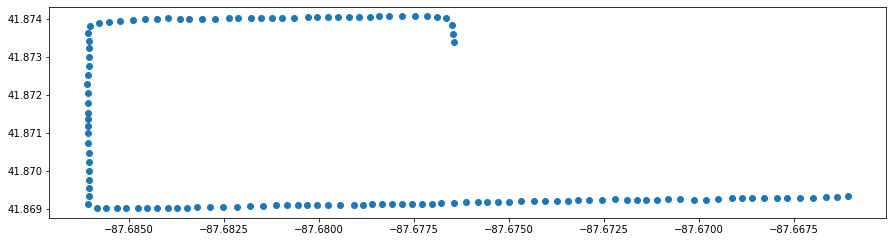

In [7]:
#Converting to geopandas and plotting
df_geo = geopandas.GeoDataFrame(df , geometry = 'coordinates_point')
df_geo.plot(figsize = (15,15))
plt.pause(10)

In [8]:
#Function to calculate the direction between any two points
def calc_heading(lat1,long1,lat2,long2):
    geod = Geodesic.WGS84
    g = geod.Inverse(lat1, long1, lat2, long2)
    return g['azi1']

In [9]:
for i in range(0,len(df_geo)-1):
    df_geo.loc[i,'heading'] = calc_heading(df_geo.loc[i,'Latitude'] ,df_geo.loc[i,'Longitude'],
                                       df_geo.loc[i+1,'Latitude'],df_geo.loc[i+1,'Longitude'])
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358


In [10]:
#The last row will not have a value for heading, hence copying it with the same heading of the previous row
df_geo.loc[df_geo.shape[0]-1,'heading'] = df_geo.loc[df_geo.shape[0]-2,'heading']
df_geo.loc[124]

Latitude                                  41.8734
Longitude                                -87.6764
Time                       2011-04-09 20:13:19+03
coordinates               [-87.676445, 41.873378]
coordinates_point    POINT (-87.676445 41.873378)
heading                                   176.256
Name: 124, dtype: object

In [11]:
print(type(df_geo['Time']))
df_geo.head()

<class 'pandas.core.series.Series'>


,Latitude,Longitude,Time,coordinates,coordinates_point,heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358


In [12]:
#Need to convert the Time column to appropriate datatype
df_geo['Time'] = pd.to_datetime(df_geo['Time'], format='%Y/%m/%d %H:%M:%S')
df_geo['Time']

0     2011-04-09 20:04:56+03:00
1     2011-04-09 20:05:04+03:00
2     2011-04-09 20:05:07+03:00
3     2011-04-09 20:05:10+03:00
4     2011-04-09 20:05:13+03:00
                 ...           
120   2011-04-09 20:13:01+03:00
121   2011-04-09 20:13:06+03:00
122   2011-04-09 20:13:11+03:00
123   2011-04-09 20:13:15+03:00
124   2011-04-09 20:13:19+03:00
Name: Time, Length: 125, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [13]:
#The first point is the start, hence it has covered 0 km
df_geo.loc[0,'distance_km']=0
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.0
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,NaN
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,NaN
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,NaN
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,NaN


In [14]:
#Function to calculate the distance between any two points
def calc_distance(lat1,long1,lat2,long2):
    geod = Geodesic.WGS84
    g = geod.Inverse(lat1, long1, lat2, long2)
    return g['s12']/1000

In [15]:
for i in range(0,df_geo.shape[0]-1):
    df_geo.loc[i+1,'distance_km'] = calc_distance(df_geo.loc[i+1,'Latitude'] ,df_geo.loc[i+1,'Longitude'],
                                       df_geo.loc[i,'Latitude'],df_geo.loc[i,'Longitude'])
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171


In [16]:
#The first point is assumed to have 0 km/h speed
df_geo.loc[0,'velocity_kmh'] = 0
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.0
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,NaN
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,NaN
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,NaN
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,NaN


In [17]:
#Function to calculate the speed at every point in km/h
def calc_velocity(dist_km, time_start, time_end):
    if time_end > time_start:
        return (dist_km / (((time_end - time_start).seconds)/3600))
    else: 
        return 0

In [18]:
for i in range(1,df_geo.shape[0]):
    df_geo.loc[i,'velocity_kmh'] = calc_velocity(df_geo.loc[i,'distance_km'] ,df_geo.loc[i-1,'Time'],
                                       df_geo.loc[i,'Time'])
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628


In [19]:
#Finding all neighbours for a point within a radius of 0.0008 km
from scipy import spatial
pts = list(df_geo['coordinates'])
kdtree = spatial.KDTree(pts)
neigh_list = []

#We cycle over every point and calculate its neighbours with the function query_ball_point
for i in pts[ : :2]:
    neigh_list.append(kdtree.query_ball_point(i, r=0.0008))
    
#print(neigh_list)

In [20]:
#Function to calculate the mean_heading  -- the heading at intersections are not accurate
def calc_mean_heading(neigh):
    for i in neigh:
        df_geo.loc[i,'mean_heading'] = df_geo.loc[neigh,'heading'].mean()
        
for i in neigh_list:
    calc_mean_heading(i)
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,mean_heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,-92.334712
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,-92.334712
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,-91.465899
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,-91.465899
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,-90.246397


In [21]:
#Function to map the GPS point to its road name -- Takes time to compute, accuracy of map matching is not the best
def map_matching(row):
    geolocator = Nominatim()
    location = geolocator.reverse(str(row['Latitude'])+','+str(row['Longitude']),timeout=10000)
    #print(location.raw)
    return location.raw['address']['road'].lower() 

In [22]:
df_geo['road'] = df_geo.apply(map_matching,axis=1)

<ipython-input-21-192cfc3f9c7f>:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  geolocator = Nominatim()


In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_geo

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,mean_heading,road
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,-92.334712,west taylor street
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,-92.334712,south ashland avenue
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,-91.465899,west taylor street
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,-91.465899,west taylor street
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,-90.246397,west taylor street
5,41.869279,-87.667693,2011-04-09 20:05:16+03:00,"[-87.667693, 41.869279]",POINT (-87.66769 41.86928),-91.256352,0.029804,35.765313,-90.246397,west grenshaw street
6,41.869275,-87.667937,2011-04-09 20:05:18+03:00,"[-87.667937, 41.869275]",POINT (-87.66794 41.86928),-90.439157,0.020262,36.471203,-91.072054,west grenshaw street
7,41.869273,-87.668286,2011-04-09 20:05:21+03:00,"[-87.668286, 41.869273]",POINT (-87.66829 41.86927),-89.750209,0.028975,34.769848,-91.072054,west grenshaw street
8,41.869274,-87.668593,2011-04-09 20:05:24+03:00,"[-87.668593, 41.869274]",POINT (-87.66859 41.86927),-89.999909,0.025487,30.584902,-91.919338,west grenshaw street
9,41.869274,-87.668866,2011-04-09 20:05:30+03:00,"[-87.66886600000002, 41.869274]",POINT (-87.66887 41.86927),-91.496737,0.022664,13.598695,-91.919338,west grenshaw street


In [24]:
#Printing all the road names
df_geo['road'].unique()

array(['west taylor street', 'south ashland avenue',
       'west grenshaw street', 'west ogden avenue',
       'south western avenue', 'west polk street', 'west flournoy street',
       'west harrison street', 'south hoyne avenue', 'south damen avenue'],
      dtype=object)

In [25]:
#Calculating the mean road heading for a particular road
road_names = df_geo['road'].unique()
for road_name in road_names:
    df_geo.loc[df_geo['road']==road_name,'road_heading'] = df_geo.loc[df_geo['road']==road_name]['heading'].mean()

In [26]:
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,mean_heading,road,road_heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,-92.334712,west taylor street,-90.366540
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,-92.334712,south ashland avenue,-92.955885
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,-91.465899,west taylor street,-90.366540
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,-91.465899,west taylor street,-90.366540
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,-90.246397,west taylor street,-90.366540


In [27]:
#Data Cleaning
#Removing all points whose velocity<5kmh
df_geo = df_geo.drop(df_geo[df_geo['velocity_kmh']<=5].index)

#Counting number of points in each road
#for road_name in road_names:
#         print(road_name, len(df_geo[df_geo['road']==road_name])) 

#Removing data points belonging to a road if the number of GPS points on that road is less than 10
#for road_name in road_names:
#         if(len(df_geo[df_geo['road']==road_name]) < 10):
#            df_geo=df_geo.drop(df_geo[df_geo['road']==road_name].index)
#road_names = df_geo['road'].unique()

In [28]:
#Function to find relative direction of each point with respect to the road
def relative_direction(row):
    if abs(row['heading'] - row['road_heading']) < 20:
        return 'similar'
    else:
        return 'opposite'
df_geo['relative_direction'] = df_geo.apply(relative_direction,axis=1)
df_geo

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,mean_heading,road,road_heading,relative_direction
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,-92.334712,south ashland avenue,-92.955885,similar
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,-91.465899,west taylor street,-90.366540,similar
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,-91.465899,west taylor street,-90.366540,similar
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,-90.246397,west taylor street,-90.366540,similar
5,41.869279,-87.667693,2011-04-09 20:05:16+03:00,"[-87.667693, 41.869279]",POINT (-87.66769 41.86928),-91.256352,0.029804,35.765313,-90.246397,west grenshaw street,-91.057206,similar
6,41.869275,-87.667937,2011-04-09 20:05:18+03:00,"[-87.667937, 41.869275]",POINT (-87.66794 41.86928),-90.439157,0.020262,36.471203,-91.072054,west grenshaw street,-91.057206,similar
7,41.869273,-87.668286,2011-04-09 20:05:21+03:00,"[-87.668286, 41.869273]",POINT (-87.66829 41.86927),-89.750209,0.028975,34.769848,-91.072054,west grenshaw street,-91.057206,similar
8,41.869274,-87.668593,2011-04-09 20:05:24+03:00,"[-87.668593, 41.869274]",POINT (-87.66859 41.86927),-89.999909,0.025487,30.584902,-91.919338,west grenshaw street,-91.057206,similar
9,41.869274,-87.668866,2011-04-09 20:05:30+03:00,"[-87.66886600000002, 41.869274]",POINT (-87.66887 41.86927),-91.496737,0.022664,13.598695,-91.919338,west grenshaw street,-91.057206,similar
10,41.869269,-87.669122,2011-04-09 20:05:34+03:00,"[-87.669122, 41.869269]",POINT (-87.66912 41.86927),-93.674256,0.021260,19.134365,-91.285778,west grenshaw street,-91.057206,similar


In [29]:
road_attr = pd.DataFrame(columns = ['road_name' , 'oneway' ,'average_speed_similar','average_speed_opp','speed limit'])
road_attr['road_name'] = road_names

In [30]:
#To find out if road is oneway or two way
road_oneway = {}
for road_name in road_names:
        if len(df_geo[df_geo['road']==road_name]) > 10:
            similar_count = len(df_geo[ (df_geo.road == road_name) & (df_geo.relative_direction=='similar')])
            opposite_count = len(df_geo[ (df_geo.road == road_name) & (df_geo.relative_direction=='opposite')])
            if similar_count / (similar_count+opposite_count) > 0.9:
                print(road_name , ": oneway")
                road_attr.loc[road_attr['road_name']==road_name ,'oneway'] = 'yes'
                road_oneway[road_name]="yes"
            elif opposite_count / (similar_count+opposite_count) > 0.9:
                print(road_name , ": oneway reverse")
                road_attr.loc[road_attr['road_name']==road_name ,'oneway'] = '-1'
                road_oneway[road_name]="-1"
            else:
                print(road_name, ": twoway")
                road_attr.loc[road_attr['road_name']==road_name ,'oneway'] = 'no'
                road_oneway[road_name]="no"
road_attr.head()

west taylor street : oneway
west grenshaw street : oneway
south western avenue : oneway
west harrison street : oneway


,road_name,oneway,average_speed_similar,average_speed_opp,speed limit
0,west taylor street,yes,NaN,NaN,NaN
1,south ashland avenue,NaN,NaN,NaN,NaN
2,west grenshaw street,yes,NaN,NaN,NaN
3,west ogden avenue,NaN,NaN,NaN,NaN
4,south western avenue,yes,NaN,NaN,NaN


In [31]:
# To find out average speed of a road
for road_name in road_names:
    if 'yes' in road_attr[road_attr['road_name'] == road_name]['oneway'].values:   
        if len(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='similar')])>10:
            avg_speed_similar = round(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='similar')]['velocity_kmh'].mean(),3)
            road_attr.loc[road_attr['road_name']==road_name , 'average_speed_similar'] = avg_speed_similar
    elif '-1' in road_attr[road_attr['road_name'] == road_name]['oneway'].values:
        if len(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='opposite')])>10:
            avg_speed_opp = round(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='opposite')]['velocity_kmh'].mean(),3)
            road_attr.loc[road_attr['road_name']==road_name , 'average_speed_opp'] = avg_speed_opp
    elif 'no' in road_attr[road_attr['road_name'] == road_name]['oneway'].values:
        if len(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='similar')])>10:
            avg_speed_similar = round(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='similar')]['velocity_kmh'].mean(),3)
            road_attr.loc[road_attr['road_name']==road_name , 'average_speed_similar'] = avg_speed_similar
        if len(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='opposite')])>10:
            avg_speed_opp = round(df_geo[(df_geo['road']==road_name) & (df_geo['relative_direction']=='opposite')]['velocity_kmh'].mean(),3)  
            road_attr.loc[road_attr['road_name']==road_name , 'average_speed_opp'] = avg_speed_opp
road_attr

,road_name,oneway,average_speed_similar,average_speed_opp,speed limit
0,west taylor street,yes,30.573,NaN,NaN
1,south ashland avenue,NaN,NaN,NaN,NaN
2,west grenshaw street,yes,27.855,NaN,NaN
3,west ogden avenue,NaN,NaN,NaN,NaN
4,south western avenue,yes,29.508,NaN,NaN
5,west polk street,NaN,NaN,NaN,NaN
6,west flournoy street,NaN,NaN,NaN,NaN
7,west harrison street,yes,32.065,NaN,NaN
8,south hoyne avenue,NaN,NaN,NaN,NaN
9,south damen avenue,NaN,NaN,NaN,NaN


In [32]:
#To calculate VCR
df_geo['VCR'] = -(df_geo['velocity_kmh'] - df_geo['velocity_kmh'].shift(-1))
df_geo['VCR'] = df_geo['VCR'] / df_geo['velocity_kmh']
df_geo.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,mean_heading,road,road_heading,relative_direction,VCR
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,-92.334712,south ashland avenue,-92.955885,similar,1.550036
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,-91.465899,west taylor street,-90.366540,similar,0.165212
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,-91.465899,west taylor street,-90.366540,similar,0.056654
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,-90.246397,west taylor street,-90.366540,similar,0.021731
5,41.869279,-87.667693,2011-04-09 20:05:16+03:00,"[-87.667693, 41.869279]",POINT (-87.66769 41.86928),-91.256352,0.029804,35.765313,-90.246397,west grenshaw street,-91.057206,similar,0.019737


In [33]:
#Declaring a new dataframe with only the points which satisfy our base condition: -0.15<VCR<0.15
road_attr = road_attr.set_index(road_attr.columns[0])
df_geo_speedlimit = df_geo[(df_geo['VCR']>0.15) | (df_geo['VCR']<-0.15)]

In [34]:
#Funstion to calculate mean Velocity roadwise
def calc_mean_velocity():
    mean_velocity = df_geo_speedlimit['velocity_kmh'].groupby(df_geo['road']).mean()
    road_attr['mean_velocity'] = mean_velocity


In [35]:
#Function to calculate the mean of the top 20% speed in each road 
def calc_highspeed_mean():
    highspeed_mean = (df_geo_speedlimit.groupby(df_geo_speedlimit['road']).apply(lambda x: x.nlargest(round(int(len(x) * 0.2)), 'velocity_kmh')['velocity_kmh'].mean()))
    road_attr['highspeed_mean'] = highspeed_mean
    

In [36]:
#Funstion to calculate speedlimit for every road
def calc_speedlimit(row):
    if(row['count']>30):
        if (row['mean_velocity']+row['highspeed_mean'])/2<=40:
            return 30
        elif (row['mean_velocity']+row['highspeed_mean'])/2>40 & (row['mean_velocity']+row['highspeed_mean'])/2<=55:
            return 50
        elif (row['mean_velocity']+row['highspeed_mean'])/2>55 & (row['mean_velocity']+row['highspeed_mean'])/2<=65:
            return 60
        elif (row['mean_velocity']+row['highspeed_mean'])/2>65 & (row['mean_velocity']+row['highspeed_mean'])/2<=75:
            return 70
        elif (row['mean_velocity']+row['highspeed_mean'])/2>75 & (row['mean_velocity']+row['highspeed_mean'])/2<=85:
            return 80
        elif (row['mean_velocity']+row['highspeed_mean'])/2>85:
            if (row['mean_velocity']+2*row['highspeed_mean'])/3>85 & (row['mean_velocity']+2*row['highspeed_mean'])/2<=110:
                return 100
            elif (row['mean_velocity']+2*row['highspeed_mean'])/3>110 & (row['mean_velocity']+2*row['highspeed_mean'])/2<=125:
                return 120
            elif (row['mean_velocity']+2*row['highspeed_mean'])/3>125:
                return 130


In [37]:
count = df_geo.groupby(['road']).size()
road_attr['count'] = count
road_attr.head()

,oneway,average_speed_similar,average_speed_opp,speed limit,count
road_name,,,,,
west taylor street,yes,30.573,NaN,NaN,36
south ashland avenue,NaN,NaN,NaN,NaN,1
west grenshaw street,yes,27.855,NaN,NaN,27
west ogden avenue,NaN,NaN,NaN,NaN,1
south western avenue,yes,29.508,NaN,NaN,18


In [38]:
calc_mean_velocity()
calc_highspeed_mean()
road_attr.head()

,oneway,average_speed_similar,average_speed_opp,speed limit,count,mean_velocity,highspeed_mean
road_name,,,,,,,
west taylor street,yes,30.573,NaN,NaN,36,22.596804,31.444803
south ashland avenue,NaN,NaN,NaN,NaN,1,11.149134,NaN
west grenshaw street,yes,27.855,NaN,NaN,27,21.886688,29.745492
west ogden avenue,NaN,NaN,NaN,NaN,1,21.145522,NaN
south western avenue,yes,29.508,NaN,NaN,18,18.136591,NaN


In [39]:
road_attr['speed limit'] = road_attr.apply(calc_speedlimit,axis=1)
road_attr

,oneway,average_speed_similar,average_speed_opp,speed limit,count,mean_velocity,highspeed_mean
road_name,,,,,,,
west taylor street,yes,30.573,NaN,30.0,36,22.596804,31.444803
south ashland avenue,NaN,NaN,NaN,NaN,1,11.149134,NaN
west grenshaw street,yes,27.855,NaN,NaN,27,21.886688,29.745492
west ogden avenue,NaN,NaN,NaN,NaN,1,21.145522,NaN
south western avenue,yes,29.508,NaN,NaN,18,18.136591,NaN
west polk street,NaN,NaN,NaN,NaN,1,NaN,NaN
west flournoy street,NaN,NaN,NaN,NaN,1,NaN,NaN
west harrison street,yes,32.065,NaN,30.0,31,23.537511,32.982125
south hoyne avenue,NaN,NaN,NaN,NaN,1,NaN,NaN


### Areas for improvement
The map-matching using Nominatim() to map the GPS points onto their corresponding roads was not highly accurate
